## Packages

In [19]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
from pathlib import Path
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use("ggplot")

## Data

In [2]:
PATH = Path("../Data/H1.csv")
df = pd.read_csv(PATH, usecols=["ArrivalDateYear", "ArrivalDateMonth", "ArrivalDateWeekNumber", "ArrivalDateDayOfMonth", "IsCanceled"])
df["date"] = pd.to_datetime(
    df["ArrivalDateYear"].astype(str) + "-" + df["ArrivalDateMonth"].astype(str) + "-" + df["ArrivalDateDayOfMonth"].astype(str), 
    format="%Y-%B-%d")

df["Date (Year and Week Number)"] = df["date"].dt.strftime("%Y%U").astype(int) + 1

df_grouped = df.groupby("Date (Year and Week Number)", as_index=False).agg({"IsCanceled": "sum"})

In [3]:
df_grouped.head()

,Date (Year and Week Number),IsCanceled
0,201527,41
1,201528,48
2,201529,87
3,201530,74
4,201531,101


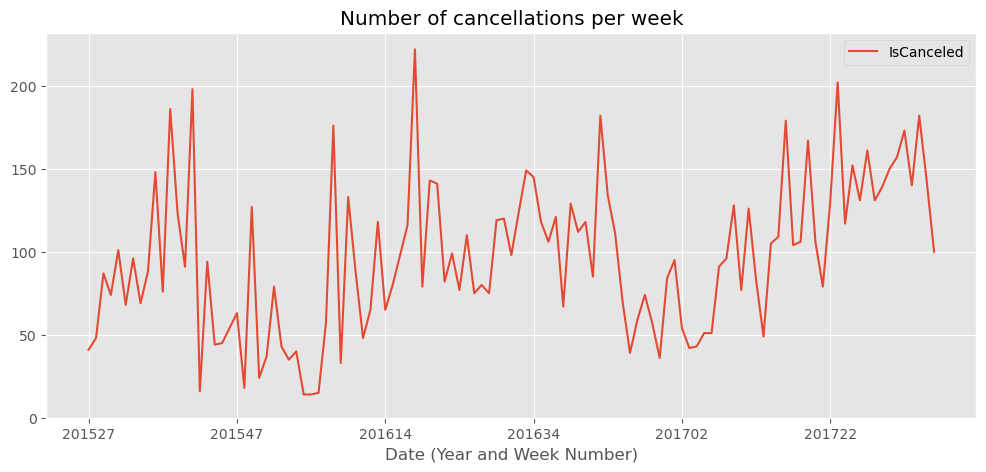

In [ ]:
df_grouped["Date (Year and Week Number)"] = df_grouped["Date (Year and Week Number)"].astype(str)
df_grouped.plot(
    x="Date (Year and Week Number)", 
    y="IsCanceled", kind="line", 
    figsize=(12, 5), 
    title="Number of cancellations per week",
    ylim=(0, max(df_grouped["IsCanceled"])+10)
);

## 1. Decomposition

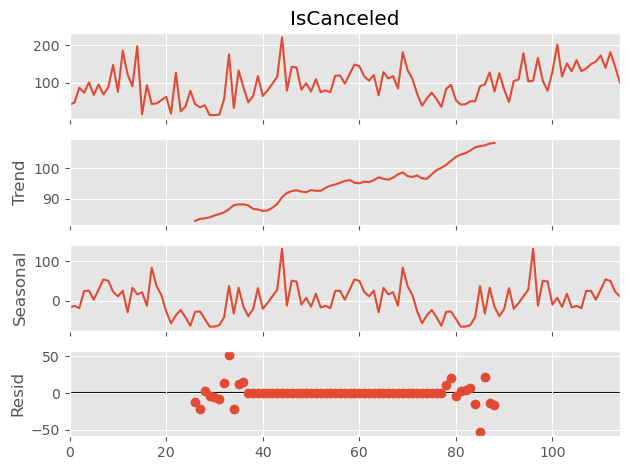

In [18]:
decomposed = seasonal_decompose(df_grouped["IsCanceled"], model="additive", period=52)
decomposed.plot();

## 2. ACF-PACF

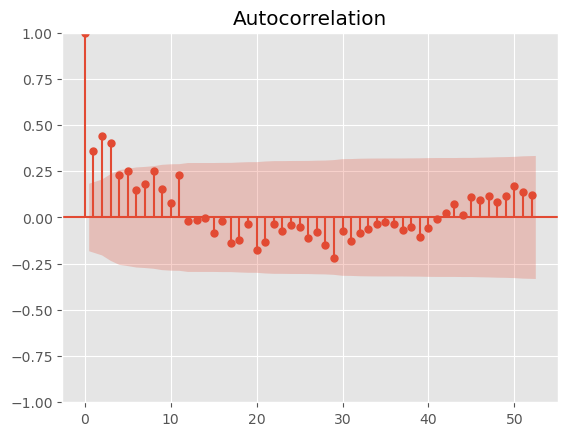

In [20]:
# ACF
plot_acf(df_grouped["IsCanceled"], lags=52);

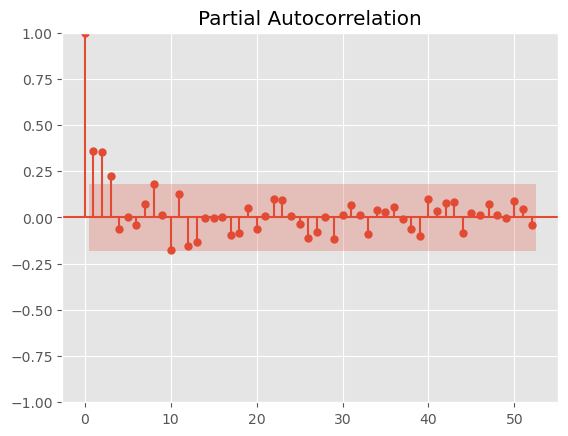

In [21]:
# PACF
plot_pacf(df_grouped["IsCanceled"], lags=52);

## 3. 4-period SMA

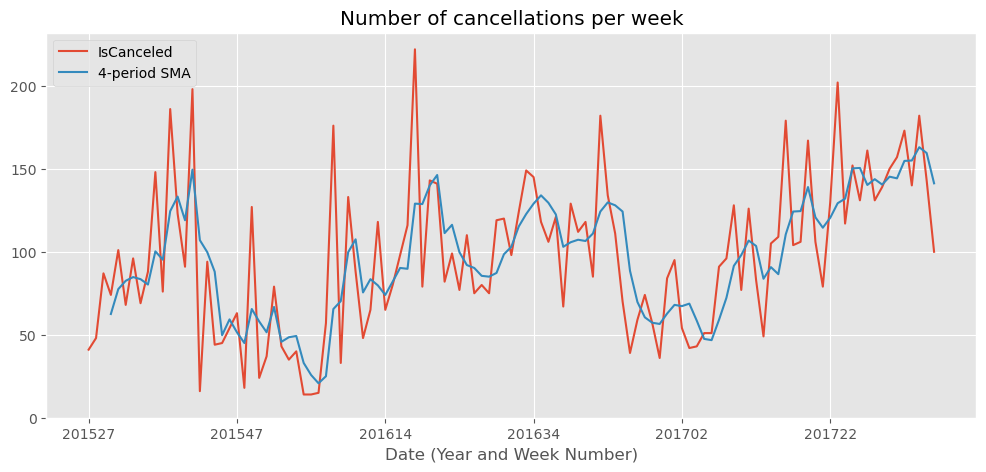

In [22]:
# 4 period SMA
df_grouped["4-period SMA"] = df_grouped["IsCanceled"].rolling(window=4).mean()

# Plot
df_grouped.plot(
    x="Date (Year and Week Number)", 
    y=["IsCanceled", "4-period SMA"], 
    kind="line", 
    figsize=(12, 5), 
    title="Number of cancellations per week",
    ylim=(0, max(df_grouped["IsCanceled"])+10)
);

## 4. Split into train-test

In [27]:
df_grouped = df_grouped.drop(columns=["4-period SMA"])

In [28]:
pct_train = 0.9
train_size = int(len(df_grouped) * pct_train)
train = df_grouped.iloc[:train_size]
test = df_grouped.iloc[train_size:]
train.shape, test.shape

((103, 2), (12, 2))

In [29]:
train.to_csv("../Data/train.csv", index=False)
test.to_csv("../Data/test.csv", index=False)

In [30]:
df_grouped.head()

,Date (Year and Week Number),IsCanceled
0,201527,41
1,201528,48
2,201529,87
3,201530,74
4,201531,101
